# Projet 3 - Concevez une application au service de la santé publique

# Nettoyage des données

## 1/ Chargement des packages

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2/ Chargement du dataset principal et premier nettoyage (sélection des colonnes) lors du chargement

In [2]:
# nombre de lignes à charger en même temps en mémoire
chunksize = 10 ** 4
filename = 'C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/en.openfoodfacts.org.products.csv'

nan_rates = []

for chunk in pd.read_csv(filename, chunksize=chunksize, sep='\t'):
    nan_rates.append(chunk.isna().mean(axis=0))
    
# moyenne des taux de remplissage des chunks
inds_nan_rate = pd.concat(nan_rates, axis=1).mean(axis=1)
cols_to_load = inds_nan_rate[inds_nan_rate < 0.7].index.tolist()

data = pd.read_csv(filename, sep='\t', usecols=cols_to_load)

C:\Users\raflg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (0,14,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raflg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (8,14,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raflg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (0,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raflg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (14,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raflg\anaconda3\

C:\Users\raflg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (8,30) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raflg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (0,8,14,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raflg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (8,14,30,32,63) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raflg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3364: DtypeWarning: Columns (14,30,32,63) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\raflg\anaco

In [3]:
#Nombre de colonnes restantes
len(cols_to_load)

50

## 3/ Nettoyage des colonnes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472598 entries, 0 to 2472597
Data columns (total 50 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   code                                                   object 
 1   url                                                    object 
 2   creator                                                object 
 3   created_t                                              int64  
 4   created_datetime                                       object 
 5   last_modified_t                                        int64  
 6   last_modified_datetime                                 object 
 7   product_name                                           object 
 8   brands                                                 object 
 9   brands_tags                                            object 
 10  categories                                             object 
 11

In [5]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'countries', 'countries_tags', 'countries_en', 'ingredients_text',
       'ingredients_tags', 'additives_n', 'nutriscore_score',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'food_groups',
       'food_groups_tags', 'food_groups_en', 'states', 'states_tags',
       'states_en', 'ecoscore_grade', 'main_category', 'main_category_en',
       'image_url', 'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score

In [9]:
#Analyse des colonnes à supprimer

#data[['brands', 'brands_tags']].isna().mean()

#data[['categories', 'categories_tags', 'categories_en']].isna().mean()

#data[['countries', 'countries_tags', 'countries_en']]
#data[['countries', 'countries_tags', 'countries_en']].isna().mean()

#data[['ingredients_text', 'ingredients_tags']].head(50)
#data[['ingredients_text', 'ingredients_tags']].isna().mean()

#df[['nutriscore_score', 'nutriscore_grade']]

#df[['pnns_groups_1', 'pnns_groups_2']].value_counts()
#df[['pnns_groups_1', 'pnns_groups_2']].isna().mean()

#df[['food_groups', 'food_groups_tags', 'food_groups_en']].value_counts()
#df[['food_groups', 'food_groups_tags', 'food_groups_en']].isna().mean()

#df[['states', 'states_tags', 'states_en']].value_counts()
#df[['states', 'states_tags', 'states_en']].isna().mean()

#df[['main_category', 'main_category_en']].isna().mean()

#df[['energy-kcal_100g', 'energy_100g']]

#df[['nutriscore_score', 'nutrition-score-fr_100g']].value_counts()
#df[['nutriscore_score', 'nutrition-score-fr_100g']].isna().mean()

categories         0.577263
categories_tags    0.577272
categories_en      0.577272
dtype: float64

In [10]:
#Liste des colonnes à supprimer
cols_to_remove = ['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
                  'image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 
                  'image_nutrition_url', 'image_nutrition_small_url', 'brands_tags',
                  'categories', 'categories_tags', 'countries', 'countries_tags', 'ingredients_text', 'ingredients_tags', 
                  'pnns_groups_1', 'food_groups', 'food_groups_tags', 'states', 'states_tags', 'main_category', 
                  'nutriscore_score']

In [11]:
data = data.drop(columns=cols_to_remove)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472598 entries, 0 to 2472597
Data columns (total 24 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   code                                                   object 
 1   product_name                                           object 
 2   brands                                                 object 
 3   categories_en                                          object 
 4   countries_en                                           object 
 5   additives_n                                            float64
 6   nutriscore_grade                                       object 
 7   pnns_groups_2                                          object 
 8   food_groups_en                                         object 
 9   states_en                                              object 
 10  ecoscore_grade                                         object 
 11

In [13]:
#S'assurer que la colonne 'code' est un type objet
data['code'] = data['code'].astype(str)

In [15]:
#Recherche Nan dans la colonne 'code'
data[data['code'].isna()]

,code,product_name,brands,categories_en,countries_en,additives_n,nutriscore_grade,pnns_groups_2,food_groups_en,states_en,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g


In [16]:
#Enregistrement du premier nettoyage
data.to_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/openfoodfacts_1stclean.csv', index=False)

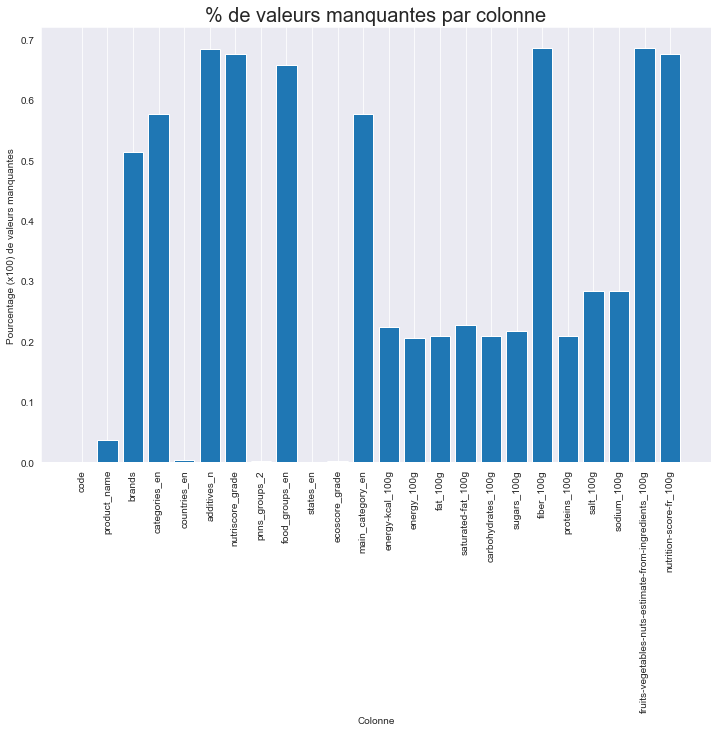

In [226]:
#Visualisation des valeurs manquantes par colonne
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.bar(data.columns, data.isna().mean())
plt.grid(axis='y')
plt.xlabel('Colonne')
plt.ylabel('Pourcentage (x100) de valeurs manquantes')
plt.xticks(rotation=90)
plt.title('% de valeurs manquantes par colonne', fontsize=20)
plt.savefig('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/bar_col_nan.png', bbox_inches='tight')
plt.show()

## 4/ Nettoyage des lignes avec valeurs nutritionnelles manquantes (au moins 3 indicateurs manquants)

In [224]:
data = pd.read_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/openfoodfacts_1stclean.csv')

C:\Users\raflg\AppData\Local\Temp\ipykernel_3872\2668370727.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/openfoodfacts_1stclean.csv')


In [225]:
data['code'] = data['code'].astype(str)

In [227]:
ind_nut = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
           'salt_100g', 'sodium_100g']

In [228]:
#Attribution de 0 pour les sous catégrories NaN si la catégorie est à 0
data.loc[(data['saturated-fat_100g'].isna()) & (data['fat_100g']==0), 'saturated-fat_100g'] = 0
data.loc[(data['sugars_100g'].isna()) & (data['carbohydrates_100g']==0), 'sugars_100g'] = 0

In [229]:
#Suppression des lignes ayant au moins trois indicateurs nutritionnels manquants
idx_nut_nan = data[ind_nut].isna().mean(axis=1)
idx_to_remove = idx_nut_nan[idx_nut_nan >= 3/len(ind_nut)].index.tolist()

In [230]:
data = data.drop(index=idx_to_remove).reset_index(drop=True)

## 5/ Nettoyage de la colonne catégorie

In [231]:
#Analyse des valeurs uniques de la colonne catégorie (intérêt pour les NaN)
data['categories_en'].value_counts(dropna=False)

NaN                                                                                                                                                            931136
Snacks                                                                                                                                                          34115
Groceries,Sauces                                                                                                                                                16371
Snacks,Sweet snacks,Biscuits and cakes,Biscuits                                                                                                                 15725
Snacks,Sweet snacks,Confectioneries                                                                                                                             15627
                                                                                                                                                                ...  
fr:d

In [232]:
#Suppression des lignes avec valeurs manquantes en catégorie
data = data.dropna(subset=['categories_en'])

In [233]:
data = data.reset_index(drop=True)

## 6/Nettoyage des dupliqués

- Création d'une colonne de taux de valeurs manquantes pour chaque produit. Le taux servira a conservé les dupliqués les mieux remplis

In [235]:
data['%_NaN'] = data[['countries_en', 'additives_n', 'nutriscore_grade', 'pnns_groups_2', 'food_groups_en',
                      'states_en', 'ecoscore_grade', 'main_category_en', 'energy-kcal_100g', 'energy_100g', 
                      'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
                      'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g',
                      'nutrition-score-fr_100g']].isna().mean(axis=1)

In [236]:
data = data.sort_values(by=['code', '%_NaN']).reset_index(drop=True)

In [237]:
data = data[~data.duplicated(subset=['code'], keep='last')].reset_index(drop=True)
data = data.drop(columns='%_NaN')

## 7/ Nettoyage des valeurs aberrantes des indicateurs nutritionnelles

- Suppression des lignes avec 'nutrition-score' manquant

In [238]:
data = data[(data['nutrition-score-fr_100g'].notna())].reset_index(drop=True)

In [239]:
ind_nut
ind_nut = ['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

- Suppression des lignes avec un total des valeurs nutritionnelles aberrant

In [240]:
#Suppression des lignes où la somme des valeurs nutritionnelles pour 100gr est supérieure à 100gr
idx_nut_gr = data[ind_nut].sum(axis=1)
idx_to_remove = idx_nut_gr[idx_nut_gr > 100 ].index.tolist()

data = data.drop(index=idx_to_remove).reset_index(drop=True)

In [241]:
#Suppression des lignes où la somme des valeurs nutritionnelles pour 100gr est inférieure à 0gr
idx_nut_gr = data[ind_nut].sum(axis=1)

data = data.drop(index=idx_nut_gr[idx_nut_gr < 0 ].index.tolist()).reset_index(drop=True)

- Suppression des lignes avec un sous groupe supérieur au groupe

In [243]:
#Suppression des lignes où 'saturated-fat' > 'fat' et 'sugars' > 'carbohydrates'
data = data[~(data['fat_100g'] < data['saturated-fat_100g'])]
data = data[~(data['carbohydrates_100g'] < data['sugars_100g'])]

- Suppression des lignes avec des valeurs aberrantes (et extrêmes) pour chaque valeur nutritionnelle

In [244]:
#Suppression des lignes inférieures à 0 et supérieures au percetile 99 pour les indicateurs nutritionnels
ind_nut = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
            'proteins_100g', 'salt_100g', 'sodium_100g']

for ind in ind_nut:
    data = data[((data[ind] >= 0) & (data[ind]<=np.nanpercentile(data[ind],99))) | (data[ind].isna())]

In [245]:
#Suppression des lignes pour 'fruits-vegetables-nutes-estimate-from-ingredients_100g' (<0, >100)
data = data[((data['fruits-vegetables-nuts-estimate-from-ingredients_100g']>=0) & 
            (data['fruits-vegetables-nuts-estimate-from-ingredients_100g']<=100)) | 
            (data['fruits-vegetables-nuts-estimate-from-ingredients_100g'].isna())]

- Suppression des valeurs aberrantes pour l'indicateur 'energy-kcal_100g' : valeur maximale de 900 (voir lien ci-dessous)<br>
https://www.nutrisens.com/vitalites/comment-decrypter-les-valeurs-nutritionnelles/
- Suppression des valeurs aberrantes pour l'indicateur 'nutrition-score-fr_100g' : valeurs entre -15 et 40 (voir lien ci-dessous, p.41)<br>
https://solidarites-sante.gouv.fr/IMG/pdf/rapport_Hercberg_15_11_2013.pdf

In [247]:
#Suppression des lignes pour 'energy-kcal_100g' (<0, >900)
data = data[((data['energy-kcal_100g']>=0) & (data['energy-kcal_100g']<=900)) | (data['energy-kcal_100g'].isna())]

In [248]:
#Suppression des lignes pour 'nutrition-score-fr_100g' (<-15, >40)
data = data[((data['nutrition-score-fr_100g']>=-15) & (data['nutrition-score-fr_100g']<=40)) | 
            (data['nutrition-score-fr_100g'].isna())]

In [249]:
data = data.reset_index(drop=True)

## 8/ Remplacer les valeurs manquantes (Imputation)

- Nous allons imputer les valeurs manquantes pour les valeurs nutritionnelles pour 100gr (sans formule) à l'aide de l'IterativeImputer

In [250]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

- Pour justifier l'utilisation d'un IterativeImputer, nous allons constater les corrélations entre les valeurs nutritionnelles

<AxesSubplot:>

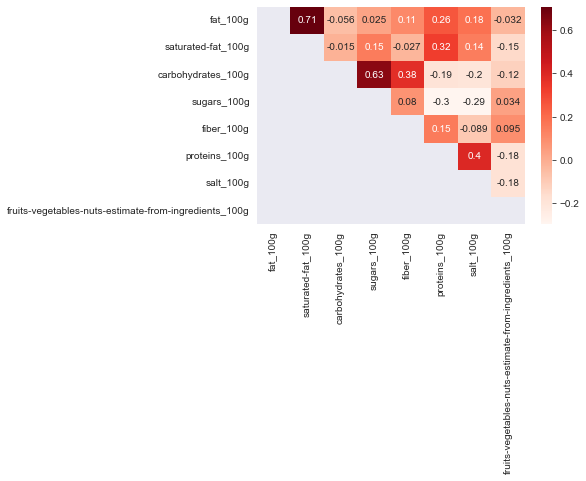

In [251]:
corr = data[['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 
             'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']].corr()

sns.heatmap(corr, annot=True, cmap='Reds', mask=np.tril(np.ones_like(corr, dtype=bool)))

- En réalisant des régressions linéaires entre différents indicateurs nutritionnels, nous pouvons nous rendre compte des variations de valeurs les uns en fonction des autres

In [252]:
import statsmodels.formula.api as smf

#Régression linéaire entre 'fat' et 'proteins'
reg = smf.ols('fat_100g ~ proteins_100g', data=data)
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fat_100g   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                 4.960e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:08:54   Log-Likelihood:            -2.8792e+06
No. Observations:              698818   AIC:                         5.758e+06
Df Residuals:                  698816   BIC:                         5.759e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.7741      0.026    338.263      0.000       8.723       8.825
proteins_100g     0.5115      0.002    222.708      0.000       0.507       0.516
==============================================================================
Omnibus:                   333838.568   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2220801.851
Skew:                           2.226   Prob(JB):                         0.00
Kurtosis:                      10.514   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
#Régression linéaire entre 'carbohydrates' et 'fiber'
reg = smf.ols('carbohydrates_100g ~ fiber_100g', data=data)
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     carbohydrates_100g   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                 6.179e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:08:54   Log-Likelihood:            -1.7335e+06
No. Observations:              376387   AIC:                         3.467e+06
Df Residuals:                  376385   BIC:                         3.467e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.2483      0.051    417.754      0.000      21.149      21.348
fiber_100g     3.6633      0.015    248.576      0.000       3.634       3.692
==============================================================================
Omnibus:                    29975.409   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32965.375
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                       2.552   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
#Régression linéaire entre 'sugars' et 'salt'
reg = smf.ols('sugars_100g ~ salt_100g', data=data)
res = reg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sugars_100g   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                 6.590e+04
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:08:54   Log-Likelihood:            -2.8958e+06
No. Observations:              698804   AIC:                         5.792e+06
Df Residuals:                  698802   BIC:                         5.792e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.5712      0.025    632.678      0.000      15.523      15.619
salt_100g     -4.9473      0.019   -256.716      0.000      -4.985      -4.910
==============================================================================
Omnibus:                   174116.025   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           347918.363
Skew:                           1.529   Prob(JB):                         0.00
Kurtosis:                       4.610   Cond. No.                         2.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Procédons au IterativeImputer

In [255]:
#Conservons une copie du dataframe pour tester la précision du IterativeImputer
data_imputer_test = data[data['carbohydrates_100g'].notna()].copy()

In [256]:
#Choix des colonnes à garder pour le modèle
imputer_cols = ['pnns_groups_2', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
                'proteins_100g', 'salt_100g', 'sodium_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g']

non_imputer_cols = ['code', 'product_name', 'brands', 'categories_en', 'countries_en', 'additives_n',  'nutriscore_grade', 
                    'pnns_groups_2', 'food_groups_en', 'states_en', 'ecoscore_grade', 'main_category_en', 'energy-kcal_100g', 
                    'energy_100g', 'nutrition-score-fr_100g']

In [257]:
#Séparation de la dataframe en deux pour effectuer l'IterativeImputer sur les colonnes qui nous intéressent
data_imputer = data[imputer_cols].reset_index(drop=True).copy()
data_non_imputer = data[non_imputer_cols].reset_index(drop=True).copy()

In [258]:
#Encodage de la colonne 'pnns_groups_2' en valeur numérique
data_imputer = data_imputer.replace(to_replace={
    'pnns_groups_2':{cat:i for i, cat in enumerate(data['pnns_groups_2'].unique())}})

In [259]:
#Réalisation de l'IterativeImputer
it_imputer = IterativeImputer(min_value=0)
data_imputer = pd.DataFrame(it_imputer.fit_transform(data_imputer), columns=data_imputer.columns)

In [260]:
data_imputer = data_imputer.round(1)
data_imputer = data_imputer.drop(columns='pnns_groups_2')

In [261]:
#Nouveau jeu de données avec valeurs obtenues de l'IterativeImputer
data = pd.concat([data_non_imputer, data_imputer], axis=1)

In [262]:
#Test de la précision de l'IterativeImputer
import random

index_to_test = data_imputer_test.index.tolist()
index_sample = random.sample(index_to_test, int(0.2*len(index_to_test)))

In [263]:
data_imputer_test.loc[index_sample, 'carbohydrates_100g'] = np.nan
data_imputer_test = data_imputer_test[imputer_cols]
data_imputer_test

,pnns_groups_2,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Dairy desserts,0.2,0.1,NaN,3.9,NaN,10.0,0.09,0.036,NaN
1,Dressings and sauces,8.2,2.2,NaN,22.0,0.0,5.1,4.60,1.840,0.0
2,One-dish meals,0.3,0.1,5.3,3.9,NaN,0.9,0.42,0.168,NaN
3,Biscuits and cakes,22.0,15.5,27.3,21.9,4.4,4.6,0.10,0.040,NaN
4,Fruits,0.0,0.0,36.0,27.0,3.6,0.6,0.00,0.000,NaN
...,...,...,...,...,...,...,...,...,...,...
698828,unknown,27.0,17.0,19.0,18.0,NaN,6.0,0.19,0.076,NaN
698829,Cereals,0.5,0.0,80.0,0.0,NaN,7.0,0.00,0.000,NaN
698830,unknown,20.2,6.0,30.9,10.4,NaN,7.4,1.10,0.440,NaN
698831,Biscuits and cakes,7.6,4.8,35.0,24.0,NaN,2.6,0.28,0.112,12.0


In [264]:
#Encodage de la colonne 'pnns_groups_2' en valeur numérique
pnns_encoder = pd.DataFrame.from_dict({cat:i for i, cat in enumerate(data['pnns_groups_2'].unique())},
                                       orient='index').reset_index().rename(columns={'index':'pnns_groups_2', 
                                                                                     0:'pnns_encoded'})

In [265]:
data_imputer_test = pd.merge(data_imputer_test, pnns_encoder, how='left', 
                             left_on='pnns_groups_2', 
                             right_on='pnns_groups_2').drop(columns='pnns_groups_2').set_index(data_imputer_test.index)

In [266]:
it_imputer = IterativeImputer(min_value=0)
data_imputer_ = pd.DataFrame(it_imputer.fit_transform(data_imputer_test), 
                             columns=data_imputer_test.columns).set_index(data_imputer_test.index)
data_imputer_ = data_imputer_.round(1)

In [267]:
#Calcul du score RMSE
from sklearn.metrics import *

y = data.loc[index_sample, 'carbohydrates_100g']
y_pred = data_imputer_.loc[index_sample, 'carbohydrates_100g']

print('RMSE :', np.sqrt(mean_squared_error(y, y_pred)))

RMSE : 18.585172817188976


- Assurons nous à nouveau de ne pas avoir de valeurs aberrantes sur les valeurs nutritionnelles

In [268]:
ind_nut = ['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']

#Suppression des lignes où la somme des valeurs nutritionnelles pour 100gr est supérieure à 100gr
idx_nut_gr = data[ind_nut].sum(axis=1)
idx_to_remove = idx_nut_gr[idx_nut_gr > 100 ].index.tolist()

data = data.drop(index=idx_to_remove).reset_index(drop=True)

#Suppression des lignes où la somme des valeurs nutritionnelles pour 100gr est inférieure à 0gr
idx_nut_gr = data[ind_nut].sum(axis=1)
idx_to_remove = idx_nut_gr[idx_nut_gr < 0 ].index.tolist()

data = data.drop(index=idx_to_remove).reset_index(drop=True)

In [269]:
#Suppression des lignes où 'saturated-fat' > 'fat' et 'sugars' > 'carbohydrates'
data = data[~(data['fat_100g'] < data['saturated-fat_100g'])]
data = data[~(data['carbohydrates_100g'] < data['sugars_100g'])]

In [270]:
#Suppression des lignes inférieures à 0 et supérieures au percetile 99 pour les indicateurs nutritionnels
ind_nut = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 
            'proteins_100g', 'salt_100g', 'sodium_100g']

for ind in ind_nut:
    data = data[((data[ind] >= 0) & (data[ind]<=np.nanpercentile(data[ind],99))) | (data[ind].isna())]
    
#Suppression des lignes pour 'fruits-vegetables-nutes-estimate-from-ingredients_100g' (<0, >100)
data = data[((data['fruits-vegetables-nuts-estimate-from-ingredients_100g']>=0) & 
            (data['fruits-vegetables-nuts-estimate-from-ingredients_100g']<=100)) | 
            (data['fruits-vegetables-nuts-estimate-from-ingredients_100g'].isna())]

In [271]:
data = data.reset_index(drop=True)

- Imputation manuelle de 'energy-kcal_100g'<br>
La formule est E.(kcal) = 9*fat + 4*Carbohydrates + 4*proteins (pour 100gr)

In [272]:
data['energy-kcal_100g_adj'] = np.round((9*data['fat_100g']) + (4*data['carbohydrates_100g']) + (4*data['proteins_100g']),0)

- Imputation manuelle de 'energy_100g'<br>
Cet indicateur correspond à l'énergie pour 100gr exprimée en kJ : 1 kcal = 4.1868 kJ<br>
Nous allons donc refaire le calcul pour compléter la colonne

In [273]:
data['energy-kJ_100g'] = np.round(data['energy-kcal_100g_adj'] * 4.1868, 0)

- Imputation manuelle du 'nutriscore_grade'

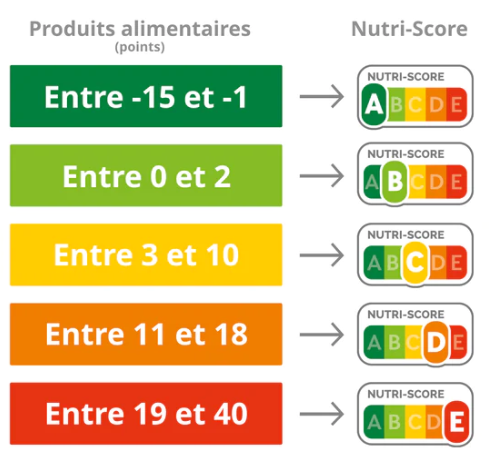

In [274]:
from IPython.display import Image
Image(filename='C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/Nutriscore.png') 

In [275]:
#Attribution du nutriscore selon la valeur du 'nutrition score'
nut_score = [(data['nutrition-score-fr_100g']>=-15) & (data['nutrition-score-fr_100g']<0),
             (data['nutrition-score-fr_100g']>=0) & (data['nutrition-score-fr_100g']<3),
             (data['nutrition-score-fr_100g']>=3) & (data['nutrition-score-fr_100g']<11),
             (data['nutrition-score-fr_100g']>=11) & (data['nutrition-score-fr_100g']<19),
             (data['nutrition-score-fr_100g']>=19) & (data['nutrition-score-fr_100g']<=40)]

nut_grade = ['A', 'B', 'C', 'D', 'E']

data['nutriscore_adjusted'] = np.select(nut_score, nut_grade)
data['nutriscore_adjusted'].replace({'0':np.nan}, inplace=True)

In [276]:
#Enregistrement final du jeu de données nettoyés
data.to_csv('C:/Users/raflg/Downloads/OpenClassrooms/Projet 3/openfoodfacts_cleaned.csv', index=False)